# input

In [1]:
import pandas as pd
#saved in the notebook 'entire mouse brain--mapmycells analysis'
vor_path = r'D:\Desktop\python_research_file\Voronoi_layer5.csv'
vor = pd.read_csv(vor_path)
ori_path = r'D:\Desktop\python_research_file\Original_layer5.csv'
ori = pd.read_csv(ori_path)


In [2]:
import esda
import libpysal as ps
import numpy as np

D:\Anaconda\envs\st\lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.12.1-CAPI-1.18.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


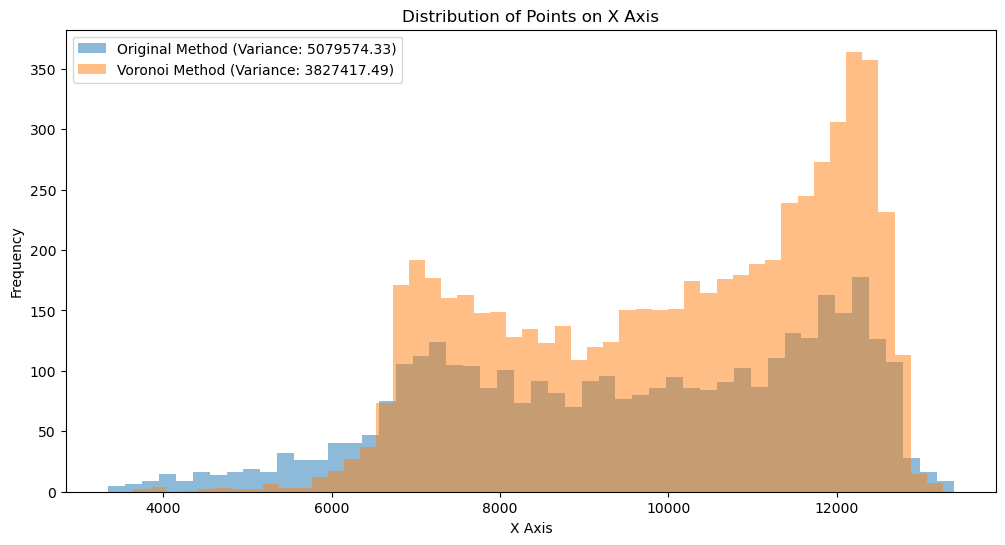

In [3]:
#Distribution of Points on X Axis plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
original_data=ori
voronoi_data=vor

original_x_variance = np.var(original_data['x'])
voronoi_x_variance = np.var(voronoi_data['x'])

plt.figure(figsize=(12, 6))

plt.hist(original_data['x'], bins=50, alpha=0.5, label=f'Original Method (Variance: {original_x_variance:.2f})')
plt.hist(voronoi_data['x'], bins=50, alpha=0.5, label=f'Voronoi Method (Variance: {voronoi_x_variance:.2f})')

plt.xlabel('X Axis')
plt.ylabel('Frequency')
plt.title('Distribution of Points on X Axis')
plt.legend()
plt.show()


# whole piece comparison

## customize line

In [68]:
#define the m,b as slope and intercept
m = -0.85 # Example slope 
b = 22400  # Example intercept 

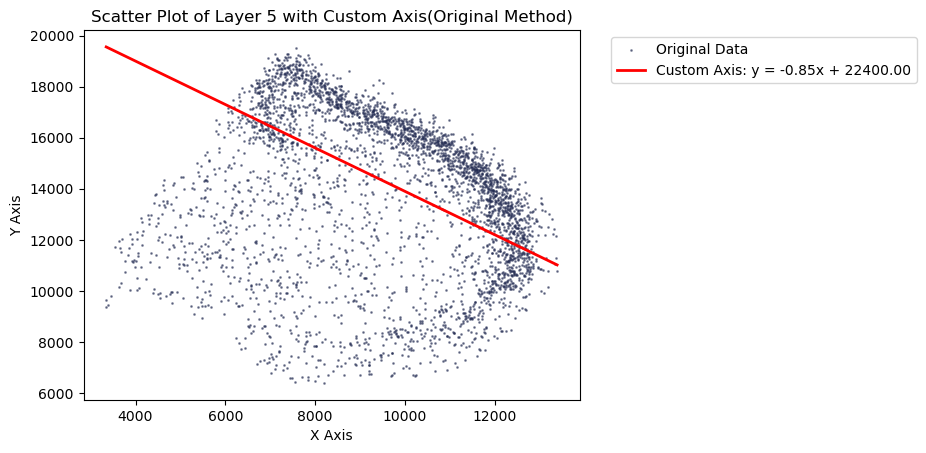

In [107]:
#original data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define a custom axis: y = m*x + b
# m = -0.85 # Example slope 
# b = 22000  # Example intercept 

# Define a range for X values to plot the custom axis
x_vals = np.linspace(original_data['x'].min(), original_data['x'].max(), 1000)
y_vals = m * x_vals + b  # y = m*x + b

# Plot the original scatter data
plt.scatter(original_data['x'], original_data['y'], s=1, color='#212a51', alpha=0.5, label='Original Data')

# Plot the custom axis
plt.plot(x_vals, y_vals, color='red', label=f'Custom Axis: y = {m:.2f}x + {b:.2f}', linewidth=2)

# Add labels and legend
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Scatter Plot of Layer 5 with Custom Axis(Original Method)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# Show the plot
plt.show()


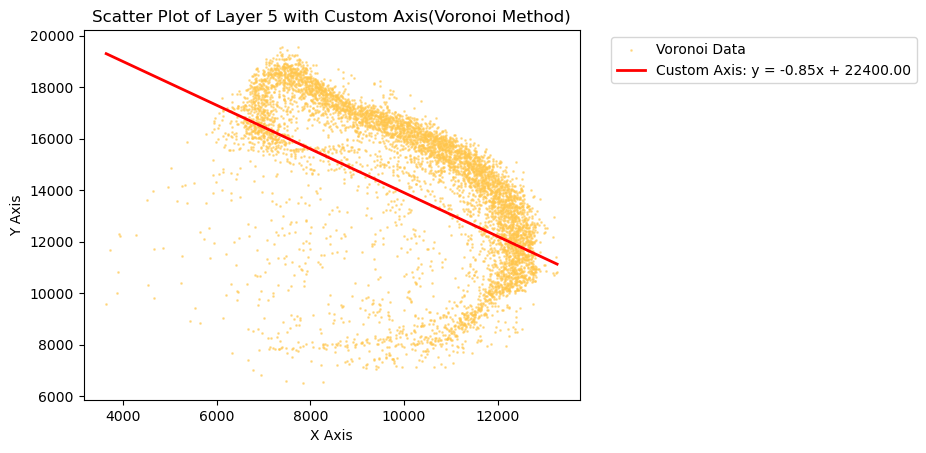

In [106]:
#Voronoi data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define a custom axis: y = m*x + b
# m = -0.85 # Example slope 
# b = 21000  # Example intercept 

# Define a range for X values to plot the custom axis
x_vals = np.linspace(voronoi_data['x'].min(), voronoi_data['x'].max(), 1000)
y_vals = m * x_vals + b  # y = m*x + b

# Plot the voronoi scatter data
plt.scatter(voronoi_data['x'], voronoi_data['y'], s=1, color='#ffc64b', alpha=0.5, label='Voronoi Data')

# Plot the custom axis
plt.plot(x_vals, y_vals, color='red', label=f'Custom Axis: y = {m:.2f}x + {b:.2f}', linewidth=2)

# Add labels and legend
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Scatter Plot of Layer 5 with Custom Axis(Voronoi Method)')
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# Show the plot
plt.show()


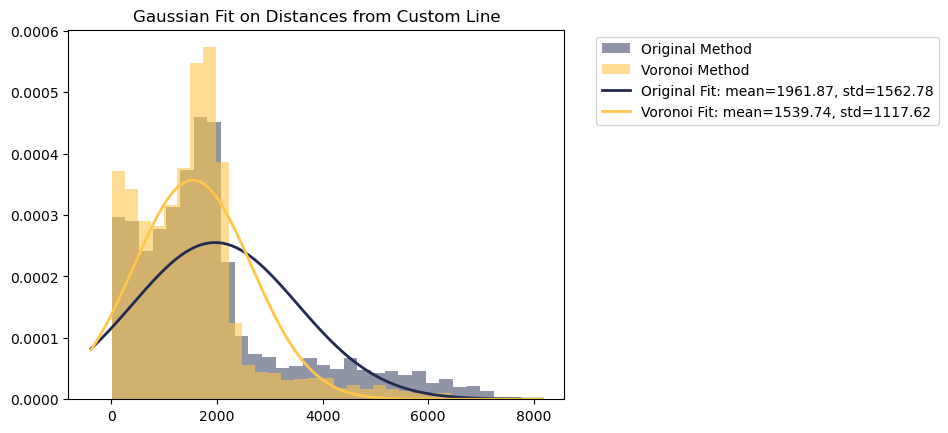

In [79]:
#不投影，对x-axis拟合
# m = -0.85 # Example slope 
# b = 22500  # Example intercept 
def distance_from_line(x, y, m, b):
    # 公function: |mx - y + b| / sqrt(m^2 + 1)
    return np.abs(m * x - y + b) / np.sqrt(m**2 + 1)

distances_original = distance_from_line(original_data['x'], original_data['y'], m, b)
distances_voronoi = distance_from_line(voronoi_data['x'], voronoi_data['y'], m, b)


mean_original, std_original = norm.fit(distances_original)

mean_voronoi, std_voronoi = norm.fit(distances_voronoi)

plt.hist(distances_original, bins=30, density=True, alpha=0.5, color='#212a51', label='Original Method')
plt.hist(distances_voronoi, bins=30, density=True, alpha=0.6, color='#ffc64b', label='Voronoi Method')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p_original = norm.pdf(x, mean_original, std_original)
p_voronoi = norm.pdf(x, mean_voronoi, std_voronoi)

plt.plot(x, p_original, color='#212a51', linewidth=2, label=f'Original Fit: mean={mean_original:.2f}, std={std_original:.2f}')
plt.plot(x, p_voronoi, color='#ffc64b', linewidth=2, label=f'Voronoi Fit: mean={mean_voronoi:.2f}, std={std_voronoi:.2f}')

plt.title('Gaussian Fit on Distances from Custom Line')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()



In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, chisquare
from sklearn.metrics import r2_score

# calculate R²
def calculate_r2(data, mean, std):
    x_vals = np.linspace(min(data), max(data), len(data))
    pdf = norm.pdf(x_vals, mean, std)
    
    hist, bin_edges = np.histogram(data, bins=30, density=True)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    
    pdf_interpolated = np.interp(bin_centers, x_vals, pdf)
    
    r2 = r2_score(hist, pdf_interpolated)
    return r2

# calculate Chi-Squared Test
def calculate_chi_squared(data, mean, std):
    x_vals = np.linspace(min(data), max(data), len(data))
    pdf = norm.pdf(x_vals, mean, std)
    
    hist, bin_edges = np.histogram(data, bins=30)
    
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    
    bin_widths = np.diff(bin_edges)
    
    pdf_interpolated = np.interp(bin_centers, x_vals, pdf)
    pdf_scaled = pdf_interpolated * bin_widths * np.sum(hist)  

    pdf_scaled *= np.sum(hist) / np.sum(pdf_scaled)

    chi_square_value, p_value = chisquare(hist, f_exp=pdf_scaled)
    return chi_square_value, p_value

# Assume that the fit mean and standard deviation of Voronoi and the original method have been calculated
# R²
r2_voronoi = calculate_r2(distances_voronoi, mean_voronoi, std_voronoi)
r2_original = calculate_r2(distances_original, mean_original, std_original)

# Chi-Squared Test
chi_square_voronoi, p_value_voronoi = calculate_chi_squared(distances_voronoi, mean_voronoi, std_voronoi)
chi_square_original, p_value_original = calculate_chi_squared(distances_original, mean_original, std_original)

print(f"R² (Voronoi Method): {r2_voronoi}")
print(f"Chi-Square (Voronoi Method): {chi_square_voronoi}, p-value: {p_value_voronoi}")
print(f"R² (Original Method): {r2_original}")
print(f"Chi-Square (Original Method): {chi_square_original}, p-value: {p_value_original}")


R² (Voronoi Method): 0.7327028926721475
Chi-Square (Voronoi Method): 29821.598158705478, p-value: 0.0
R² (Original Method): 0.5300451788500761
Chi-Square (Original Method): 1748.40748566361, p-value: 0.0


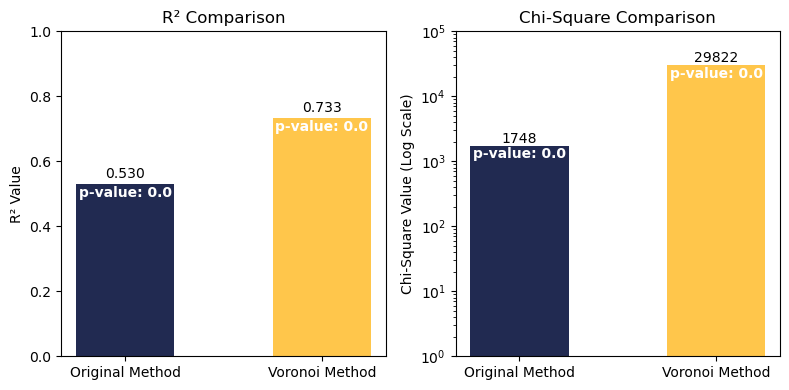

In [105]:
import matplotlib.pyplot as plt
import numpy as np

# R² 和 卡方检验的值
r2_voronoi = 0.733
r2_original = 0.530

chi_square_voronoi = 29822
chi_square_original = 1748

# p-value 值
p_value_voronoi = 0.00
p_value_original = 0.00

# X轴标签，将 Original 放在 Voronoi 左边
labels = ['Original Method', 'Voronoi Method']

# 按顺序排列 R² 值
r2_values = [r2_original, r2_voronoi]

# 按顺序排列卡方检验值
chi_square_values = [chi_square_original, chi_square_voronoi]

# 创建图形并调整大小
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

# 设置柱状图的宽度
bar_width = 0.5  # 设置为0.5宽度

# 绘制 R² 值直方图
bars1 = ax1.bar(labels, r2_values, width=bar_width, color=['#212a51', '#ffc64b'])
ax1.set_title('R² Comparison')
ax1.set_ylabel('R² Value')
ax1.set_ylim(0, 1)  # R² 的范围在 [0, 1] 之间

# 在每个柱状图上方显示 p-value 和 R² 值
for bar, r2, p_value in zip(bars1, r2_values, [p_value_original, p_value_voronoi]):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{r2:.3f}', 
             ha='center', va='bottom', color='black', fontsize=10)  # 显示R²值
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.05, f'p-value: {p_value}', 
             ha='center', va='bottom', color='white', fontsize=10, fontweight='bold')  # 显示p-value

# 绘制卡方检验值直方图，使用对数刻度
bars2 = ax2.bar(labels, chi_square_values, width=bar_width, color=['#212a51', '#ffc64b'])
ax2.set_title('Chi-Square Comparison')
ax2.set_ylabel('Chi-Square Value (Log Scale)')
ax2.set_yscale('log')  # 使用对数刻度
ax2.set_ylim(1, 1e5)  # 根据实际数值选择合适的上下限

# 在每个柱状图上方显示 p-value 和 卡方检验值
for bar, chi_square, p_value in zip(bars2, chi_square_values, [p_value_original, p_value_voronoi]):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, f'{chi_square}', 
             ha='center', va='bottom', color='black', fontsize=10)  # Display Chi-Square value
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() - (0.05 * bar.get_height()), f'p-value: {p_value}', 
             ha='center', va='top', color='white', fontsize=10, fontweight='bold')  # Display p-value

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()
